<a href="https://colab.research.google.com/github/patrikLM10/hemoglobin/blob/main/hemoglobin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# prompt: open preporcessing dataset per subject fro the file

import pandas as pd
import os

# Assuming your file is named 'your_file.csv' and located in 'My Drive/your_data_folder'
# Replace with your actual file path and name

file_path = '/content/drive/My Drive/your_data_folder/your_file.csv'

try:
    df = pd.read_csv(file_path)

    # Example preprocessing (replace with your actual preprocessing steps)
    # 1. Handling missing values:
    # df.fillna(0, inplace=True)  # Fill missing values with 0
    # df.dropna(inplace=True)  # Remove rows with any missing values

    # 2. Convert data types:
    # df['column_name'] = df['column_name'].astype(int)

    # 3. Removing irrelevant columns
    # df = df.drop(columns=['unnecessary_column1', 'unnecessary_column2'])

    # 4. Processing per subject:
    subjects = df['subject'].unique() # Assuming 'subject' is a column containing subject IDs

    for subject in subjects:
        subject_df = df[df['subject'] == subject]
        # Process the subject_df here
        # Example: Save the preprocessed data for each subject
        output_folder = '/content/drive/My Drive/your_preprocessed_data_folder/'
        os.makedirs(output_folder, exist_ok=True)  # Creates the output folder if it doesn't exist
        output_file = os.path.join(output_folder, f'subject_{subject}_preprocessed.csv')
        subject_df.to_csv(output_file, index=False)

    print("Preprocessing and saving complete.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Error: File not found at /content/drive/My Drive/your_data_folder/your_file.csv


In [9]:
import pandas as pd
df = pd.read_csv('/content/Final Dataset Hb PPG.csv')
df.head()

,Red (a.u),Infra Red (a.u),Gender,Age (year),Hemoglobin (g/dL)
0,115965.9,105722.9,Male,21,17.5
1,115834.4,105746.7,Male,21,17.5
2,115741.5,105786.0,Male,21,17.5
3,115707.2,105848.1,Male,21,17.5
4,115675.6,105893.5,Male,21,17.5


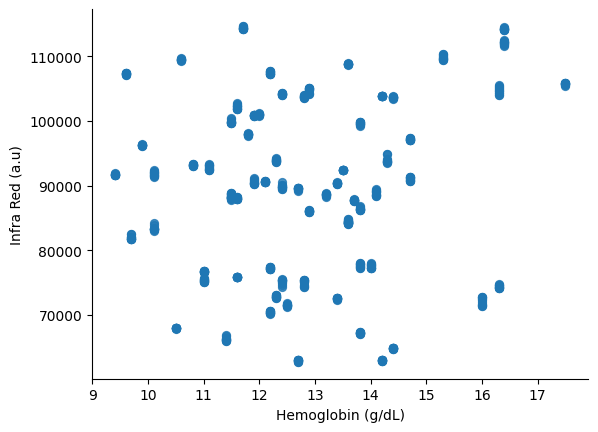

In [10]:
# @title Red (a.u) vs Infra Red (a.u)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Hemoglobin (g/dL)', y='Infra Red (a.u)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Error: Column ''Hb (g/dL)'' not found in the DataFrame. Please ensure the columns 'Infra Red (a.u)' and 'Hb (g/dL)' exist.


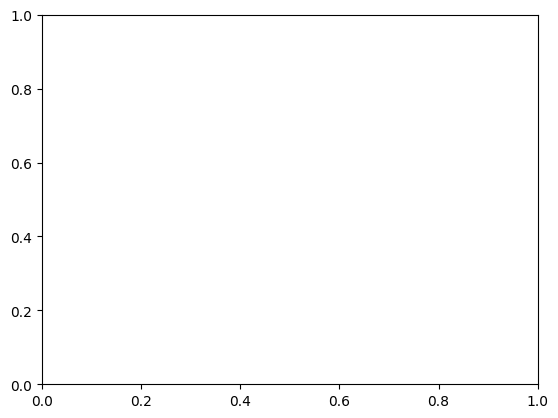

In [11]:
# prompt: from this avobe dataset plot graph of ifra red and hemoglobin

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains columns named 'Infra Red (a.u)' and 'Hb (g/dL)'
try:
    df.plot(kind='scatter', x='Infra Red (a.u)', y='Hb (g/dL)', s=32, alpha=.8)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please ensure the columns 'Infra Red (a.u)' and 'Hb (g/dL)' exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("/content/Final Dataset Hb PPG.csv")

# Feature engineering
df["R_IR_ratio"] = df["Red (a.u)"] / df["Infra Red (a.u)"]
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# Features and target
X = df[["R_IR_ratio", "Age (year)", "Gender"]]
y = df["Hemoglobin (g/dL)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Calculate RMSE (without using 'squared' argument)
rmse = mean_squared_error(y_test, preds)**0.5
print("RMSE:", rmse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 652, number of used features: 3
[LightGBM] [Info] Start training from score 12.800460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [14]:
print("RMSE:", mean_squared_error(y_test, preds)**0.5)
# Calculate the square root of the MSE to get the RMSE without using 'squared'

RMSE: 0.24998441686857592


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/Final Dataset Hb PPG.csv")

# Create subject IDs (every 12 rows)
df["Subject_ID"] = df.index // 12

# Feature Engineering
df["R_IR_ratio"] = df["Red (a.u)"] / df["Infra Red (a.u)"]
df["log_R_IR"] = np.log(df["R_IR_ratio"] + 1e-6)  # Avoid log(0)

# Subject-level features (mean, std of PPG signals per subject)
subject_features = df.groupby("Subject_ID")[["Red (a.u)", "Infra Red (a.u)", "Hemoglobin (g/dL)"]].agg(
    ["mean", "std", "min", "max", "median"]
)
subject_features.columns = ["_".join(col) for col in subject_features.columns]
df = df.merge(subject_features, left_on="Subject_ID", right_index=True)

# Temporal features (rolling mean/std within subjects)
df["Red_rolling_mean"] = df.groupby("Subject_ID")["Red (a.u)"].transform(lambda x: x.rolling(3).mean())
df["IR_rolling_std"] = df.groupby("Subject_ID")["Infra Red (a.u)"].transform(lambda x: x.rolling(3).std())

# Polynomial features
df["log_R_IR_x_Age"] = df["log_R_IR"] * df["Age (year)"]
df["log_R_IR_x_Gender"] = df["log_R_IR"] * (df["Gender"] == "Male").astype(int)

# Encode gender
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# Drop redundant columns
X = df.drop(["Hemoglobin (g/dL)", "Subject_ID", "R_IR_ratio", "Gender"], axis=1)
y = df["Hemoglobin (g/dL)"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
pip install --upgrade lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 96.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [18]:
pip install --upgrade scikit-learn

In [20]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from lightgbm.callback import early_stopping

# Train with early stopping callback
model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    num_leaves=20,
    min_data_in_leaf=10,
    lambda_l1=0.5,
    lambda_l2=0.5,
    random_state=42
)

# Use early_stopping callback
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[early_stopping(stopping_rounds=50, verbose=False)]
)
preds = model.predict(X_val)
mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

NameError: name 'X_val' is not defined

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold, train_test_split # Import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from lightgbm.callback import early_stopping # Import early_stopping

# Load dataset
df = pd.read_csv("/content/Final Dataset Hb PPG.csv")

# Create subject IDs (every 12 rows)
df["Subject_ID"] = df.index // 12

# Feature Engineering
df["R_IR_ratio"] = df["Red (a.u)"] / df["Infra Red (a.u)"]
df["log_R_IR"] = np.log(df["R_IR_ratio"] + 1e-6)  # Avoid log(0)

# Subject-level features (mean, std of PPG signals per subject)
subject_features = df.groupby("Subject_ID")[["Red (a.u)", "Infra Red (a.u)", "Hemoglobin (g/dL)"]].agg(
    ["mean", "std", "min", "max", "median"]
)
subject_features.columns = ["_".join(col) for col in subject_features.columns]
df = df.merge(subject_features, left_on="Subject_ID", right_index=True)

# Temporal features (rolling mean/std within subjects)
df["Red_rolling_mean"] = df.groupby("Subject_ID")["Red (a.u)"].transform(lambda x: x.rolling(3).mean())
df["IR_rolling_std"] = df.groupby("Subject_ID")["Infra Red (a.u)"].transform(lambda x: x.rolling(3).std())

# Polynomial features
df["log_R_IR_x_Age"] = df["log_R_IR"] * df["Age (year)"]
df["log_R_IR_x_Gender"] = df["log_R_IR"] * (df["Gender"] == "Male").astype(int)

# Encode gender
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# Drop redundant columns and handle NaNs created by rolling features
X = df.drop(["Hemoglobin (g/dL)", "Subject_ID", "R_IR_ratio", "Gender"], axis=1).dropna()
y = df.loc[X.index, "Hemoglobin (g/dL)"] # Align y with X after dropping NaNs

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-validation-test split
# First split into train and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42) # Adjust test_size as needed

# Then split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 0.5 of 0.4 is 0.2 of original data

# Train with early stopping callback
model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    num_leaves=20,
    min_data_in_leaf=10,
    lambda_l1=0.5,
    lambda_l2=0.5,
    random_state=42
)

# Use early_stopping callback
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[early_stopping(stopping_rounds=50, verbose=False)]
)
preds = model.predict(X_val)
mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Warning] min_data_in_leaf is set=10, min_ch

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

# Train model
model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=7,
    num_leaves=31,
    min_data_in_leaf=5,
    reg_alpha=0.5,      # Use reg_alpha/lambda_l1
    reg_lambda=0.5,     # Use reg_lambda/lambda_l2
    random_state=42
)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[early_stopping(50)])

# Predict and evaluate
preds = model.predict(X_val)
mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [23]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 25.9 MB/s eta 0:00:00


In [24]:
from optuna import create_study

def objective(trial):
    params = {
        # Add parameter names (e.g., "learning_rate", "num_leaves")
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 10, 50),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "lambda_l1": trial.suggest_float("lambda_l1", 0, 10),
        "lambda_l2": trial.suggest_float("lambda_l2", 0, 10)
    }
    model = LGBMRegressor(**params, n_estimators=500)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_squared_error(y_val, preds)

# Run optimization
study = create_study(direction="minimize")
study.optimize(objective, n_trials=50)
print(study.best_params)

[I 2025-06-02 16:22:24,801] A new study created in memory with name: no-name-3b63ecd4-89fb-46b2-954d-ed68fb5d599a
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:24,907] Trial 0 finished with value: 0.55273463761975 and parameters: {'learning_rate': 0.003292809102624578, 'num_leaves': 19, 'max_depth': 4, 'lambda_l1': 7.408736620507021, 'lambda_l2': 9.489870437649808}. Best is trial 0 with value: 0.55273463761975.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/

[LightGBM] [Warning] lambda_l2 is set=9.489870437649808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.489870437649808
[LightGBM] [Warning] lambda_l1 is set=7.408736620507021, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.408736620507021
[LightGBM] [Warning] lambda_l2 is set=9.489870437649808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.489870437649808
[LightGBM] [Warning] lambda_l1 is set=7.408736620507021, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.408736620507021
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:25,124] Trial 2 finished with value: 0.11288439816388104 and parameters: {'learning_rate': 0.00892337044701368, 'num_leaves': 30, 'max_depth': 8, 'lambda_l1': 9.723151272128327, 'lambda_l2': 0.3053294232203041}. Best is trial 1 with value: 0.05509451274529578.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:25,197] Trial 3 finished with value: 0.07225957792063319 and parameters: {'learning_rate': 0.07436351522539385, 'n

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:25,292] Trial 4 finished with value: 0.0300725866822251 and parameters: {'learning_rate': 0.06676722613248805, 'num_leaves': 49, 'max_depth': 4, 'lambda_l1': 3.8422133994300878, 'lambda_l2': 0.7462050163151401}. Best is trial 4 with value: 0.0300725866822251.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:25,495] Trial 6 finished with value: 0.0030839712931833747 and parameters: {'learning_rate': 0.0532169101963521, 'num_leaves': 14, 'max_depth': 6, 'lambda_l1': 0.8582161115865738, 'lambda_l2': 3.5858779799483855}. Best is trial 6 with value: 0.0030839712931833747.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:25,575] Trial 7 finished with value: 0.021392410493898777 and parameters: {'learning_rate': 0.0946194446754052

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:25,661] Trial 8 finished with value: 0.032992489870298396 and parameters: {'learning_rate': 0.07178918124588379, 'num_leaves': 47, 'max_depth': 10, 'lambda_l1': 4.085867700275644, 'lambda_l2': 4.394063867153389}. Best is trial 6 with value: 0.0030839712931833747.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:25,976] Trial 10 finished with value: 0.002044072845610311 and parameters: {'learning_rate': 0.03890173178681032, 'num_leaves': 24, 'max_depth': 8, 'lambda_l1': 0.12295190159941871, 'lambda_l2': 7.229136873004165}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:26,175] Trial 11 finished with value: 0.0029558712867955297 and parameters: {'learning_rate': 0.03513274193831287, 'num_leaves': 24, 'max_depth': 8, 'lambda_l1': 0.1597120061599691, 'lambda_l2': 7.107613071776703}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:26,350] Trial 12 finished with value: 0.006641815927668693 and parameters: {'learning_rate': 0.026777883567765108, 'num_leaves': 22, 'max_depth': 8, 'lambda_l1': 0.3031657788078892, 'lambda_l2': 7.144864763999412}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:26,497] Trial 13 finished with value: 0.011046676310022312 and parameters: {'learning_rate': 0.03648932363283764, 'num_leaves': 24, 'max_depth': 8, 'lambda_l1': 1.8475242759804382, 'lambda_l2': 7.026913486481299}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:26,728] Trial 14 finished with value: 0.0025763059240432634 and parameters: {'learning_rate': 0.034644704979103755, 'num_leaves': 28, 'max_depth': 9, 'lambda_l1': 0.04025657806685462, 'lambda_l2': 6.997779599720807}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:26,863] Trial 15 finished with value: 0.007725338938656634 and parameters: {'learning_rate': 0.051082675000138314, 'num_leaves': 37, 'max_depth': 9, 'lambda_l1': 1.6147644299123725, 'lambda_l2': 6.434086505175102}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:27,143] Trial 17 finished with value: 0.048847693925164755 and parameters: {'learning_rate': 0.040441391679467247, 'num_leaves': 28, 'max_depth': 9, 'lambda_l1': 5.129624526690912, 'lambda_l2': 6.123170482812297}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=6.123170482812297, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.123170482812297
[LightGBM] [Warning] lambda_l1 is set=5.129624526690912, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.129624526690912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:27,310] Trial 18 finished with value: 0.021234533346611194 and parameters: {'learning_rate': 0.018515141902455824, 'num_leaves': 43, 'max_depth': 9, 'lambda_l1': 1.2344871267004964, 'lambda_l2': 8.455101173482012}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:27,407] Trial 19 finished with value: 0.06043328920681601 and parameters: {'learning_rate': 0.045583125202572

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:27,534] Trial 20 finished with value: 0.018112918547583786 and parameters: {'learning_rate': 0.06016621028674691, 'num_leaves': 34, 'max_depth': 10, 'lambda_l1': 2.6535730230815164, 'lambda_l2': 7.911683936282902}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:27,748] Trial 21 finished with value: 0.004440997517878505 and parameters: {'learning_rate': 0.030389235985762257, 'num_leaves': 24, 'max_depth': 8, 'lambda_l1': 0.19886859308123386, 'lambda_l2': 7.279062224553312}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:27,988] Trial 22 finished with value: 0.0028942471823718828 and parameters: {'learning_rate': 0.03263534445164803, 'num_leaves': 20, 'max_depth': 9, 'lambda_l1': 0.061756749509222775, 'lambda_l2': 6.039095142361088}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:28,169] Trial 23 finished with value: 0.014429240847117575 and parameters: {'learning_rate': 0.021462728787222145, 'num_leaves': 19, 'max_depth': 9, 'lambda_l1': 1.1423855119893407, 'lambda_l2': 5.850827764214302}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:28,308] Trial 24 finished with value: 0.011827043563989411 and parameters: {'learning_rate': 0.04473417577753191, 'num_leaves': 32, 'max_depth': 7, 'lambda_l1': 2.1469164610206257, 'lambda_l2': 2.460417223513173}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:28,494] Trial 25 finished with value: 0.021990399738100522 and parameters: {'learning_rate': 0.013782476288667331, 'num_leaves': 17, 'max_depth': 9, 'lambda_l1': 0.3363649359925606, 'lambda_l2': 5.43857595575056}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:28,648] Trial 26 finished with value: 0.010748827123472424 and parameters: {'learning_rate': 0.026986174303560

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] lambda_l2 is set=5.43857595575056, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.43857595575056
[LightGBM] [Warning] lambda_l1 is set=0.3363649359925606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3363649359925606
[LightGBM] [Warning] lambda_l2 is set=8.606015714157296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.606015714157296
[LightGBM] [Warning] lambda_l1 is set=1.0461071307771657, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0461071307771657
[LightGBM] [Warning] lambda_l2 is set=8.606015714157296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.606015714157296
[LightGBM] [Warning] lambda_l1 is set=1.0461071307771657, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0461071307771657
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:28,775] Trial 27 finished with value: 0.015571839945722662 and parameters: {'learning_rate': 0.05883219239878235, 'num_leaves': 27, 'max_depth': 9, 'lambda_l1': 2.417381802730493, 'lambda_l2': 6.598525206192616}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=6.598525206192616, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.598525206192616
[LightGBM] [Warning] lambda_l1 is set=2.417381802730493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.417381802730493
[LightGBM] [Warning] lambda_l2 is set=6.598525206192616, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.598525206192616
[LightGBM] [Warning] lambda_l1 is set=2.417381802730493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.417381802730493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:28,897] Trial 28 finished with value: 0.039177893854480166 and parameters: {'learning_rate': 0.03496578866439759, 'num_leaves': 14, 'max_depth': 7, 'lambda_l1': 4.469278788539869, 'lambda_l2': 4.112825259289302}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:29,039] Trial 29 finished with value: 0.3544479788349147 and parameters: {'learning_rate': 0.004246402761742835

[LightGBM] [Warning] lambda_l2 is set=4.112825259289302, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.112825259289302
[LightGBM] [Warning] lambda_l1 is set=4.469278788539869, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.469278788539869
[LightGBM] [Warning] lambda_l2 is set=9.92554637628331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.92554637628331
[LightGBM] [Warning] lambda_l1 is set=6.94827750111656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.94827750111656
[LightGBM] [Warning] lambda_l2 is set=9.92554637628331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.92554637628331
[LightGBM] [Warning] lambda_l1 is set=6.94827750111656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.94827750111656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Numbe

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:29,215] Trial 30 finished with value: 0.0034918280394875194 and parameters: {'learning_rate': 0.04480115183736425, 'num_leaves': 40, 'max_depth': 8, 'lambda_l1': 0.8031531500388784, 'lambda_l2': 7.559583468602056}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:29,420] Trial 31 finished with value: 0.0030469563407776313 and parameters: {'learning_rate': 0.03464022329281706, 'num_leaves': 24, 'max_depth': 8, 'lambda_l1': 0.2019183321267454, 'lambda_l2': 6.7070440093624235}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:29,648] Trial 32 finished with value: 0.004261518898756375 and parameters: {'learning_rate': 0.028403677009412157, 'num_leaves': 26, 'max_depth': 9, 'lambda_l1': 0.0866038309453585, 'lambda_l2': 5.4026855968764025}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:29,797] Trial 33 finished with value: 0.008157332420202255 and parameters: {'learning_rate': 0.03993187015332408, 'num_leaves': 23, 'max_depth': 8, 'lambda_l1': 1.543125082569183, 'lambda_l2': 7.924448482365159}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:30,029] Trial 34 finished with value: 0.03527913186196313 and parameters: {'learning_rate': 0.010820841846527152, 'num_leaves': 17, 'max_depth': 10, 'lambda_l1': 0.7328265772737517, 'lambda_l2': 6.216803948072324}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:30,376] Trial 35 finished with value: 0.0037446350934294236 and parameters: {'learning_rate': 0.031664875050979764, 'num_leaves': 29, 'max_depth': 6, 'lambda_l1': 0.01187305749397912, 'lambda_l2': 8.753219230091577}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:30,518] Trial 36 finished with value: 0.08464774861388648 and parameters: {'learning_rate': 0.023466521205472407, 'num_leaves': 31, 'max_depth': 7, 'lambda_l1': 9.529546752537158, 'lambda_l2': 7.399292582044155}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=7.399292582044155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.399292582044155
[LightGBM] [Warning] lambda_l1 is set=9.529546752537158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.529546752537158
[LightGBM] [Warning] lambda_l2 is set=4.8008708593524, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8008708593524
[LightGBM] [Warning] lambda_l1 is set=0.7282141332342231, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7282141332342231
[LightGBM] [Warning] lambda_l2 is set=4.8008708593524, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8008708593524
[LightGBM] [Warning] lambda_l1 is set=0.7282141332342231, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7282141332342231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] N

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:30,776] Trial 37 finished with value: 0.0032373867719895175 and parameters: {'learning_rate': 0.03888427064861825, 'num_leaves': 15, 'max_depth': 9, 'lambda_l1': 0.7282141332342231, 'lambda_l2': 4.8008708593524}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:30,909] Trial 38 finished with value: 0.07624023505711337 and parameters: {'learning_rate': 0.05595717544534674

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:31,114] Trial 39 finished with value: 0.005026104739120795 and parameters: {'learning_rate': 0.049021505976902524, 'num_leaves': 10, 'max_depth': 5, 'lambda_l1': 1.2552013129124377, 'lambda_l2': 1.1949648165617779}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] lambda_l2 is set=1.1949648165617779, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1949648165617779
[LightGBM] [Warning] lambda_l1 is set=1.2552013129124377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2552013129124377
[LightGBM] [Warning] lambda_l2 is set=1.1949648165617779, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1949648165617779
[LightGBM] [Warning] lambda_l1 is set=1.2552013129124377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2552013129124377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:31,295] Trial 40 finished with value: 0.017491135184852406 and parameters: {'learning_rate': 0.08467359076776312, 'num_leaves': 26, 'max_depth': 10, 'lambda_l1': 2.6664302729236162, 'lambda_l2': 9.141105856263577}. Best is trial 10 with value: 0.002044072845610311.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=9.141105856263577, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.141105856263577
[LightGBM] [Warning] lambda_l1 is set=2.6664302729236162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6664302729236162
[LightGBM] [Warning] lambda_l2 is set=9.141105856263577, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.141105856263577
[LightGBM] [Warning] lambda_l1 is set=2.6664302729236162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6664302729236162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:31,548] Trial 41 finished with value: 0.0042204687470027554 and parameters: {'learning_rate': 0.03349632533416131, 'num_leaves': 25, 'max_depth': 8, 'lambda_l1': 0.5278241628795957, 'lambda_l2': 6.711730442585076}. Best is trial 10 with value: 0.002044072845610311.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=7.636245865648382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.636245865648382
[LightGBM] [Warning] lambda_l1 is set=0.04097903980366222, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04097903980366222
[LightGBM] [Warning] lambda_l2 is set=7.636245865648382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.636245865648382
[LightGBM] [Warning] lambda_l1 is set=0.04097903980366222, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04097903980366222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:31,932] Trial 42 finished with value: 0.0013296998531637236 and parameters: {'learning_rate': 0.043258564108860094, 'num_leaves': 22, 'max_depth': 8, 'lambda_l1': 0.04097903980366222, 'lambda_l2': 7.636245865648382}. Best is trial 42 with value: 0.0013296998531637236.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:32,172] Trial 43 finished with value: 0.00777981024513141 and parameters: {'learning_rate': 0.04207703341199324, 'num_leaves': 22, 'max_depth': 8, 'lambda_l1': 1.5540917291571192, 'lambda_l2': 7.557378829020776}. Best is trial 42 with value: 0.0013296998531637236.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=7.830528232374725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.830528232374725
[LightGBM] [Warning] lambda_l1 is set=0.6448174809820885, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6448174809820885
[LightGBM] [Warning] lambda_l2 is set=7.830528232374725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.830528232374725
[LightGBM] [Warning] lambda_l1 is set=0.6448174809820885, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6448174809820885
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:32,469] Trial 44 finished with value: 0.002577448000101983 and parameters: {'learning_rate': 0.04725753554659283, 'num_leaves': 19, 'max_depth': 9, 'lambda_l1': 0.6448174809820885, 'lambda_l2': 7.830528232374725}. Best is trial 42 with value: 0.0013296998531637236.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=7.830528232374725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.830528232374725
[LightGBM] [Warning] lambda_l1 is set=0.6448174809820885, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6448174809820885
[LightGBM] [Warning] lambda_l2 is set=7.985723987253737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.985723987253737
[LightGBM] [Warning] lambda_l1 is set=0.7087949104775841, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7087949104775841
[LightGBM] [Warning] lambda_l2 is set=7.985723987253737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.985723987253737
[LightGBM] [Warning] lambda_l1 is set=0.7087949104775841, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7087949104775841
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:32,692] Trial 45 finished with value: 0.0025663979975062115 and parameters: {'learning_rate': 0.064783063840001, 'num_leaves': 19, 'max_depth': 9, 'lambda_l1': 0.7087949104775841, 'lambda_l2': 7.985723987253737}. Best is trial 42 with value: 0.0013296998531637236.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:32,854] Trial 46 finished with value: 0.025660103623948584 and parameters: {'learning_rate': 0.065551378813018

[LightGBM] [Warning] lambda_l2 is set=7.985723987253737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.985723987253737
[LightGBM] [Warning] lambda_l1 is set=0.7087949104775841, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7087949104775841
[LightGBM] [Warning] lambda_l2 is set=9.30184543060582, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.30184543060582
[LightGBM] [Warning] lambda_l1 is set=3.3709017211582744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3709017211582744
[LightGBM] [Warning] lambda_l2 is set=9.30184543060582, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.30184543060582
[LightGBM] [Warning] lambda_l1 is set=3.3709017211582744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3709017211582744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [I

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:33,094] Trial 47 finished with value: 0.002135462927890731 and parameters: {'learning_rate': 0.06401780166099204, 'num_leaves': 16, 'max_depth': 9, 'lambda_l1': 0.5970590841491191, 'lambda_l2': 8.08554113079944}. Best is trial 42 with value: 0.0013296998531637236.


[LightGBM] [Warning] lambda_l2 is set=8.08554113079944, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.08554113079944
[LightGBM] [Warning] lambda_l1 is set=0.5970590841491191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5970590841491191
[LightGBM] [Warning] lambda_l2 is set=8.08554113079944, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.08554113079944
[LightGBM] [Warning] lambda_l1 is set=0.5970590841491191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5970590841491191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:33,238] Trial 48 finished with value: 0.011794273832091725 and parameters: {'learning_rate': 0.08278722802014558, 'num_leaves': 15, 'max_depth': 9, 'lambda_l1': 1.9760604920695717, 'lambda_l2': 8.703791397194996}. Best is trial 42 with value: 0.0013296998531637236.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=8.703791397194996, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.703791397194996
[LightGBM] [Warning] lambda_l1 is set=1.9760604920695717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9760604920695717
[LightGBM] [Warning] lambda_l2 is set=8.703791397194996, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.703791397194996
[LightGBM] [Warning] lambda_l1 is set=1.9760604920695717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9760604920695717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 22
[LightGBM] [Info] Start training from score 12.735539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-02 16:22:33,423] Trial 49 finished with value: 0.005690511925389854 and parameters: {'learning_rate': 0.06604814734883277, 'num_leaves': 12, 'max_depth': 7, 'lambda_l1': 1.2875283876760024, 'lambda_l2': 8.267778946806166}. Best is trial 42 with value: 0.0013296998531637236.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
Mean Absolute Error (MAE): 0.0073 g/dL
Root Mean Squared Error (RMSE): 0.0254 g/dL
R-squared (R²): 0.9998
Adjusted R-squared: 0.9998
Mean Absolute Percentage Error (MAPE): 0.06%
Explained Variance Score: 0.9998


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


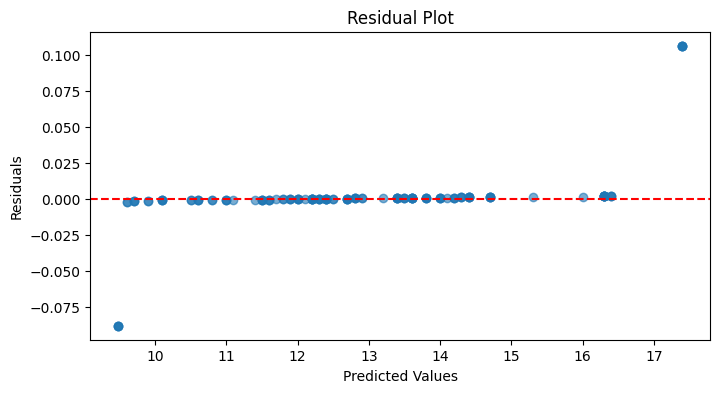

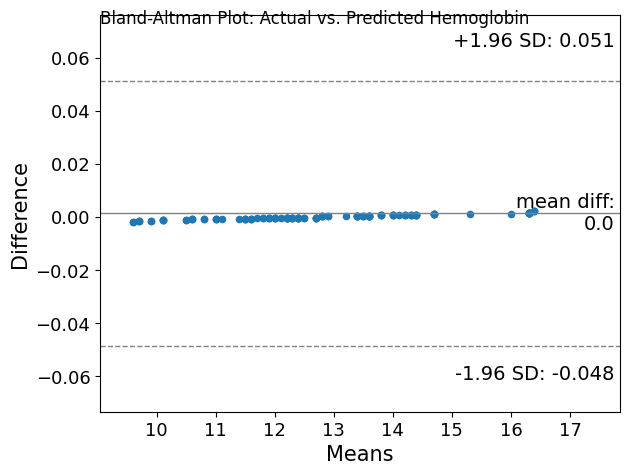

In [25]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from statsmodels.graphics.agreement import mean_diff_plot

# Example: Predict on validation/test set (ensure y_val and preds are defined)
preds = model.predict(X_val)

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, preds)
print(f"Mean Absolute Error (MAE): {mae:.4f} g/dL")  # Lower is better

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_val, preds))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} g/dL")  # Lower is better

# 3. R-squared (R²)
r2 = r2_score(y_val, preds)
print(f"R-squared (R²): {r2:.4f}")  # Higher is better (max = 1)

# 4. Adjusted R-squared
n = len(y_val)  # Number of samples
p = X_val.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.4f}")  # Penalizes unnecessary features

# 5. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_val, preds) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")  # Expresses error as a percentage

# 6. Explained Variance Score
evs = explained_variance_score(y_val, preds)
print(f"Explained Variance Score: {evs:.4f}")  # Measures variance captured by the model

# 7. Residual Analysis (Check for bias/heteroscedasticity)
residuals = y_val - preds
plt.figure(figsize=(8, 4))
plt.scatter(preds, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 8. Bland-Altman Agreement Analysis (Clinical Validation)
mean_diff_plot(y_val, preds)
plt.suptitle("Bland-Altman Plot: Actual vs. Predicted Hemoglobin")
plt.show()

In [27]:
pip install joblib


In [29]:
import joblib

# Save model with joblib (better for NumPy arrays)
joblib.dump(model, "hemoglobin_model.pkl")

['hemoglobin_model.pkl']

In [30]:
pip install fastapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00


FastAPI (High-Performance, Modern)


In [31]:
from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI()

# Load model
model = joblib.load("hemoglobin_model.pkl")

class PredictionInput(BaseModel):
    Red: float
    Infra_Red: float
    Age: int
    Gender: str

@app.post("/predict")
def predict(input: PredictionInput):
    data = input.dict()
    data["R_IR_ratio"] = data["Red"] / data["Infra_Red"]
    data["log_R_IR"] = np.log(data["R_IR_ratio"] + 1e-6)
    data["Gender"] = 0 if data["Gender"].lower() == "male" else 1
    features = pd.DataFrame([data])[["log_R_IR", "Age", "Gender"]]
    prediction = model.predict(features)
    return {"hemoglobin": float(prediction[0])}

NameError: name 'BaseModel' is not defined

In [32]:
pip install fastapi uvicorn pydantic joblib pandas lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.0 MB/s eta 0:00:00


In [33]:
from fastapi import FastAPI
from pydantic import BaseModel  # Required for data validation
import joblib
import pandas as pd
import numpy as np

# Load model
model = joblib.load("hemoglobin_model.pkl")

# Define input schema
class PredictionInput(BaseModel):
    Red: float
    Infra_Red: float
    Age: int
    Gender: str

# Initialize app
app = FastAPI()

@app.post("/predict")
def predict(input: PredictionInput):
    data = input.dict()

    # Feature engineering (replicate training pipeline)
    data["R_IR_ratio"] = data["Red"] / data["Infra_Red"]
    data["log_R_IR"] = np.log(data["R_IR_ratio"] + 1e-6)
    data["Gender"] = 0 if data["Gender"].lower() == "male" else 1

    # Select features used during training
    features = pd.DataFrame([data])[["log_R_IR", "Age", "Gender"]]

    # Predict
    prediction = model.predict(features)
    return {"hemoglobin": float(prediction[0])}